In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Queation 2(1)

In [2]:
# get the evenly distributed values
N = 10
x_even = np.linspace(0, 1, N+1)
y_even = np.linspace(0, 1, N+1)
x_even = x_even[:-1] + 1 / (2 * N)
y_even = y_even[:-1] + 1 / (2 * N)

data_even = []
for x in x_even:
    for y in y_even:
        data_even.append([x, y])
data_even = np.array(data_even)

# calculate the distance
mean = np.mean(data_even, axis=0)
msd = np.sum((data_even - mean) ** 2) / N ** 2
print('Mean:\t', mean)
print('Distance:\t', msd, '\n')

# Uniformaly distributed data
M = N ** 2
distance = []

for i in range(1000):
    # get random value
    x_random = np.random.random(M)
    y_random = np.random.random(M)
    data_random = np.array([x_random, y_random]).T
    
    tmp_mean = np.mean(data_random, axis=0)
    tmp = np.sum((data_random - tmp_mean) ** 2)
    distance.append(tmp / M)

distance = np.array(distance)
print('Mean distance:\t', np.mean(distance))
print('ration of # < mean:\t', np.sum(np.array(distance) < msd) / len(distance))
print('ration of # > mean:\t', np.sum(np.array(distance) > msd) / len(distance))

Mean:	 [ 0.5  0.5]
Distance:	 0.165 

Mean distance:	 0.164614959497
ration of # < mean:	 0.542
ration of # > mean:	 0.458


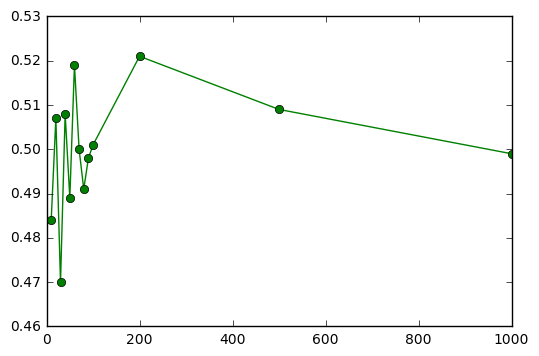

In [3]:
ratio = []
N_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 500, 1000]
for N in N_list:
    # get the evenly distributed values
    x_even = np.linspace(0, 1, N+1)
    y_even = np.linspace(0, 1, N+1)
    x_even = x_even[:-1] + 1 / (2 * N)
    y_even = y_even[:-1] + 1 / (2 * N)

    data_even = []
    for x in x_even:
        for y in y_even:
            data_even.append([x, y])
    data_even = np.array(data_even)

    # calculate the distance
    mean = np.mean(data_even, axis=0)
    msd = np.sum((data_even - mean) ** 2) / N ** 2

    # Uniformaly distributed data
    M = N ** 2
    distance = []

    for i in range(1000):
        # get random value
        x_random = np.random.random(M)
        y_random = np.random.random(M)
        data_random = np.array([x_random, y_random]).T

        tmp_mean = np.mean(data_random, axis=0)
        tmp = np.sum((data_random - tmp_mean) ** 2)
        distance.append(tmp / M)

    distance = np.array(distance)
    ratio.append(np.sum(np.array(distance) < msd) / len(distance))

plt.figure()
plt.plot(N_list, ratio, 'go-')
plt.show()

# Question 5

In [4]:
x = np.array([1.6907, 1.7242, 1.7552, 1.7842, 1.8113, 1.8369, 1.8610, 1.8839])
deads = np.array([ 6, 13, 18, 28, 52, 53, 61, 60])
total = np.array([59, 60, 62, 56, 63, 59, 62, 60])
prob = deads / total

In [5]:
linear = np.polyfit(x, prob, deg=1)
polynomial = np.polyfit(x, prob, deg=2)
print(linear)
print(polynomial)
print(np.array([34.1213, -60.4591]))

[ 5.32493697 -8.94784295]
[ -1.76661477  11.64292208 -14.58954907]
[ 34.1213 -60.4591]


In [6]:
dx = np.linspace(1.65, 2.0, 100)
y1 = linear[0] * dx + linear[1]
y2 = polynomial[0] * dx ** 2 + polynomial[1] * dx + polynomial[2]
y3 = 1 / (1 + np.exp(60.4591 - 34.1213 * dx))

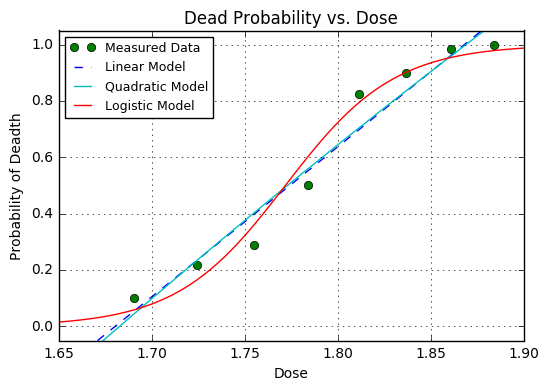

In [13]:
fig, ax = plt.subplots()
ax.set_title('Dead Probability vs. Dose')
ax.plot(x, prob, 'go', label='Measured Data')
ax.plot(dx, y1, 'b--', label='Linear Model')
ax.plot(dx, y2, 'c-', label='Quadratic Model')
ax.plot(dx, y3, 'r-', label='Logistic Model')

ax.set_ylim([-0.05, 1.05])
ax.set_xlim([1.65, 1.9])
ax.set_xlabel('Dose')
ax.set_ylabel('Probability of Deadth')
ax.grid('on')
ax.legend(loc=2, fontsize=9)
fig.savefig('fitting.pdf')
fig.savefig('fitting.png', dpi=300)
plt.show()

In [8]:
# calculate the predicted result
l1 = linear[0] * x + linear[1]
l2 = polynomial[0] * x ** 2 + polynomial[1] * x + polynomial[2]
l3 = 1 / (1 + np.exp(60.4591 - 34.1213 * x))

# calculate the MSE
L1 = np.sum((l1 - prob) ** 2) / len(prob)
L2 = np.sum((l2 - prob) ** 2) / len(prob)
L3 = np.sum((l3 - prob) ** 2) / len(prob)

# calculate AIC
AIC1 = 2 * 2 - 2 * np.log(L1) + 2 * 2 * (2 + 1) / (8 - 2 - 1)
AIC2 = 2 * 3 - 2 * np.log(L2) + 2 * 3 * (3 + 1) / (8 - 3 - 1)
AIC3 = 2 * 2 - 2 * np.log(L3) + 2 * 2 * (2 + 1) / (8 - 2 - 1)

In [9]:
print(L1, L2, L3)
print(np.log(L1), np.log(L2), np.log(L3))
print(np.log(AIC1), np.log(AIC2), np.log(AIC3))

0.00563632346423 0.00559823245465 0.00283921041603
-5.17852329408 -5.18530436416 -5.86422928799
2.81881886163 3.10774798695 2.89748300052
